# Zomato data analysis project

# Data Analysis Project Using Python

# Q1.What type of restaurant do the majority of customers order from?

# Q2.How many votes has each type of restaurant received from customers?
# Q3.What are the ratings the majority of restaurant have received?
# Q4.Zomato has observed that most couples order most of their food online.What is their aveage spending on each order?
# Q5.Which mode (online or offline) has received the maximum rating?
# Q6.Which type of restaurant received more offline order ,so that Zomato can process customers with some good offers?

# Step-1 Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step-2 Create the data frame

In [2]:
dataframe=pd.read_csv(r"C:\Users\DELL\Desktop\Learn_all\My projects\Data Analysis Project Using Python,EDA\Zomato data .csv")

In [3]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
dataframe.isnull().sum()   #for cheacking sum of null value

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [6]:
# Data Cleaning # Check missing value # Checking Outlier

In [7]:
# we get rate column
# Convert the datatype of column-rate
# create function

In [8]:
def handleRate(value):    # user define function create
    value=str(value).split('/')  #previous datatype in str then split mean cutting value
    value=value[0]   # 0th position value to get
    return float(value)  # last we get value is in float

dataframe['rate']=dataframe['rate'].apply(handleRate)  # column name rate

In [9]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [10]:
dataframe.info()  # rate converted into float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Q1.What type of restaurant do the majority of customers order from?

# Types of Restaurant

In [11]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


In [12]:
# By using (seaborn) plot get solution

Text(0.5, 0, 'type of reastaurant')

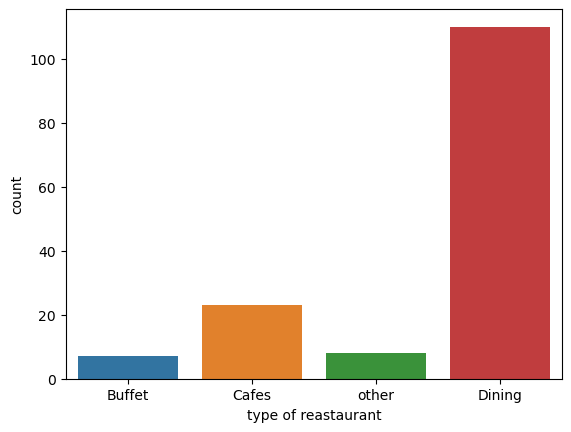

In [13]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of reastaurant")

# Conclusion: majority of the restaurant falls in dinning category.

# Q2.How many votes has each type of restaurant received from customers?

In [23]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


Text(0, 0.5, 'Votes')

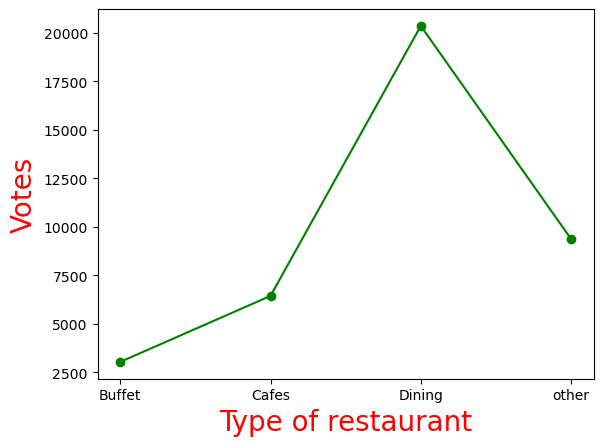

In [16]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()  # create function ,groupby & sum two columns
result=pd.DataFrame({'votes': grouped_data})  # in result pass grouped_data
plt.plot(result,c="green",marker="o")  # line colour green and marker point o
plt.xlabel("Type of restaurant",c="red",size=20) # x axis for written type of restaurant on red color with size
plt.ylabel("Votes",c="red",size=20)  # y axis for Written votes on red color

# Conclusion: Dinning restaurants has recieved maximum above 20K votes

In [17]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


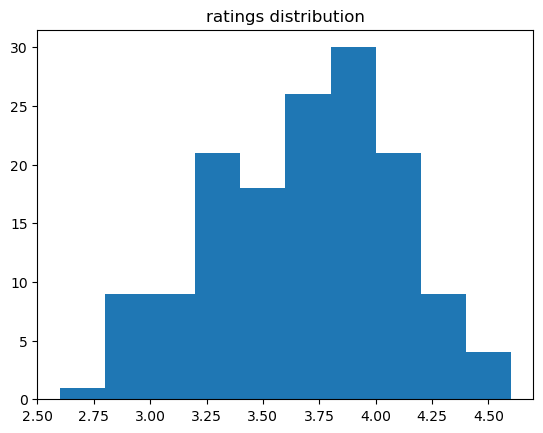

In [22]:
plt.hist(dataframe['rate'],bins=10)  #bar=bins
plt.title("ratings distribution")
plt.show()

# Q3.What are the ratings the majority of restaurant have received?

In [24]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


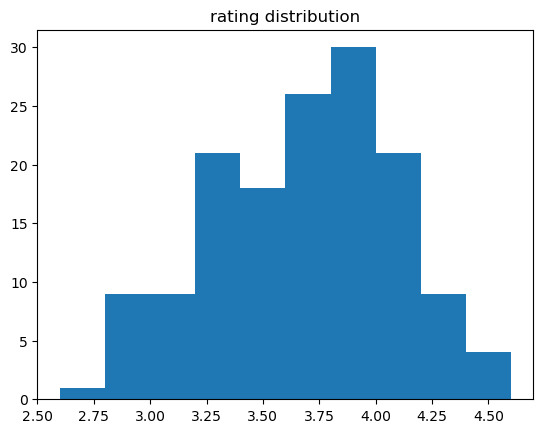

In [26]:
plt.hist(dataframe['rate'],bins=10)
plt.title("rating distribution")
plt.show()

# Conclusion:- The majority restaurant received rating from in between 3.5 to 4


# Q4.Zomato has observed that most couples order most of their food online.What is their aveage spending on each order?


In [27]:
# Average order spending by couples
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

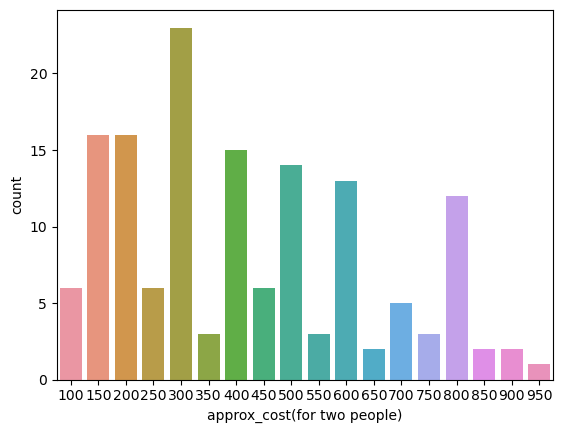

In [28]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion:- The majority of couples prefreed restaurant with an approximate cost of 300 rupees

# Q5.Which mode (online or offline) has received the maximum rating?



In [29]:
# which mode receives maximum rating 

In [30]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

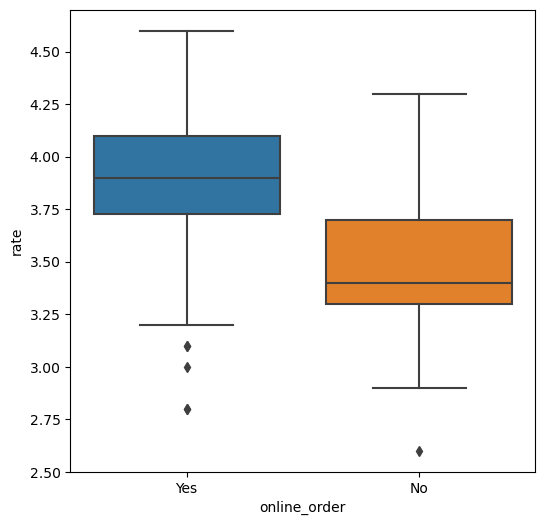

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

In [32]:
# Conclusion- Offline order received lower rating in comparision to online order.

# Q6.Which type of restaurant received more offline order ,so that Zomato can process customers with some good offers?¶

<function matplotlib.pyplot.show(close=None, block=None)>

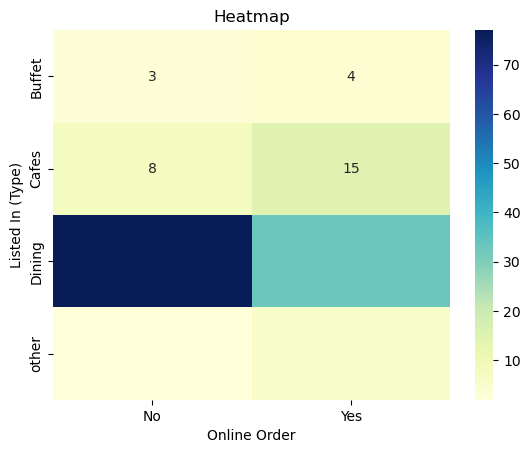

In [36]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True, cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show

In [ ]:
# Conclusion:- Dining restsursnts primarily accept offline orders,whereas cafes primarily receive online orders.
# This suggests that clients prefreed orders in person at restaurants, but prefer online ordering at cafes.